<a href="https://colab.research.google.com/github/stepsbtw/Algoritmos/blob/main/algorithms_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Leitura e Filtragem inicial dos dados
Carregue os dados em sua linguagem de programação preferida (por exemplo, Python com pandas).

In [ ]:
import pandas as pd
import requests
from io import BytesIO

r = requests.get("https://data.brasil.io/dataset/covid19/caso.csv.gz")
caso = pd.read_csv(BytesIO(r.content), compression="gzip")

r = requests.get("https://data.brasil.io/dataset/covid19/caso_full.csv.gz")
caso_full = pd.read_csv(BytesIO(r.content), compression="gzip")

In [ ]:
caso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838003 entries, 0 to 2838002
Data columns (total 13 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   date                            object 
 1   state                           object 
 2   city                            object 
 3   place_type                      object 
 4   confirmed                       int64  
 5   deaths                          int64  
 6   order_for_place                 int64  
 7   is_last                         bool   
 8   estimated_population_2019       float64
 9   estimated_population            float64
 10  city_ibge_code                  float64
 11  confirmed_per_100k_inhabitants  float64
 12  death_rate                      float64
dtypes: bool(1), float64(5), int64(3), object(4)
memory usage: 262.5+ MB


In [ ]:
caso_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3853648 entries, 0 to 3853647
Data columns (total 18 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   city                                           object 
 1   city_ibge_code                                 float64
 2   date                                           object 
 3   epidemiological_week                           int64  
 4   estimated_population                           float64
 5   estimated_population_2019                      float64
 6   is_last                                        bool   
 7   is_repeated                                    bool   
 8   last_available_confirmed                       int64  
 9   last_available_confirmed_per_100k_inhabitants  float64
 10  last_available_date                            object 
 11  last_available_death_rate                      float64
 12  last_available_deaths                     

Descrição das colunas:

- **city: nome do município (pode estar em branco quando o registro é referente ao estado, pode ser preenchido com Importados/Indefinidos também).**
- city_ibge_code: código IBGE do local.
- **date: data de coleta dos dados no formato YYYY-MM-DD.**
- epidemiological_week: número da semana epidemiológica no formato YYYYWW.
- estimated_population: população estimada para esse município/estado em 2020, segundo o IBGE. (acesse o script que faz o download e conversão dos dados de população).
- estimated_population_2019: população estimada para esse município/estado em 2019, segundo o IBGE. ATENÇÃO: essa coluna possui valores desatualizados, prefira usar a coluna estimated_population.
- is_last: campo pré-computado que diz se esse registro é o mais novo para esse local, pode ser True ou False (caso filtre por esse campo, use is_last=True ou is_last=False, não use o valor em minúsculas).
- is_repeated: campo pré-computado que diz se as informações nesse registro foram publicadas pela Secretaria Estadual de Saúde no dia date ou se o dado é repetido do último dia em que o dado está disponível (igual ou anterior a date). Isso ocorre pois nem todas as secretarias publicam boletins todos os dias. Veja também o campo last_available_date.
- **last_available_confirmed: número de casos confirmados do último dia disponível igual ou anterior à data date.**
- **last_available_confirmed_per_100k_inhabitants: número de casos confirmados por 100.000 habitantes (baseado em estimated_population) do último dia disponível igual ou anterior à data date.**
- last_available_date: data da qual o dado se refere.
- **last_available_death_rate: taxa de mortalidade (mortes / confirmados) do último dia disponível igual ou anterior à data date.**
- **last_available_deaths: número de mortes do último dia disponível igual ou anterior à data date.**
- order_for_place: número que identifica a ordem do registro para este local. O registro referente ao primeiro boletim em que esse local aparecer será contabilizado como 1 e os demais boletins incrementarão esse valor.
- place_type: tipo de local que esse registro descreve, pode ser city ou state.
- **state: sigla da unidade federativa, exemplo: SP.**
- new_confirmed: número de novos casos confirmados desde o último dia (note que caso is_repeated seja True, esse valor sempre será 0 e que esse valor pode ser negativo caso a SES remaneje os casos desse município para outro).
- new_deaths: número de novos óbitos desde o último dia (note que caso is_repeated seja True, esse valor sempre será 0 e que esse valor pode ser negativo caso a SES remaneje os casos desse município para outro).

Recomendadas para análise:
- city
- state
- last_avaible_confirmed
- last_available_deaths
- estimated_population
- last_available_confirmed_per_100k_inhabitants
- last_available_death_rate
- date

Para análises estatísticas mais simples:

In [ ]:
# Uma linha por município
df = caso[(caso["is_last"]==True) & (caso["place_type"]=="city")]

Para análise de desempenho de algoritmos com volumes maiores de dados (várias datas por município):

In [ ]:
# Séries temporais completas.
df_full = caso_full[(caso_full["place_type"]=="city") & (caso_full["is_repeated"]==False)]

Checar e tratar (remover linhas) colunas com valores nulos.

In [ ]:
df.count()

,0
date,5589
state,5589
city,5589
place_type,5589
confirmed,5589
deaths,5589
order_for_place,5589
is_last,5589
estimated_population_2019,5570
estimated_population,5570


In [ ]:
df_clean = df.dropna(subset=["confirmed_per_100k_inhabitants", "estimated_population"])
df_full.count()

,0
city,2818241
city_ibge_code,2807856
date,2818241
epidemiological_week,2818241
estimated_population,2807856
estimated_population_2019,2807856
is_last,2818241
is_repeated,2818241
last_available_confirmed,2818241
last_available_confirmed_per_100k_inhabitants,2793772


In [ ]:
df_full_clean = df_full.dropna(subset=["last_available_confirmed_per_100k_inhabitants", "estimated_population"])

# 2) Cálculo de Métricas
Para cada município:
- Taxa de casos por 100 mil habitantes:
  - casos/habitantes * 100 000
- Taxa de óbitos por 100 mil habitantes:
  - obitos/habitantes * 100 000
- Taxa de mortalidade:
  - obitos/casos

In [ ]:
# Atenção! Existem muitos municípios com o mesmo nome em estados diferentes:
counts = df_clean["city"].value_counts()
counts[counts>1]

,count
city,
São Domingos,5
Bom Jesus,5
Planalto,4
São Francisco,4
Vera Cruz,4
...,...
Petrolândia,2
Tabatinga,2
São Carlos,2


Portanto vamos usar o indentificador único do ibge.

In [ ]:
df_resposta = df_clean[["city", "state", "city_ibge_code"]].copy()

df_resposta["taxa_casos_100k"] = df_clean["confirmed"] / df_clean["estimated_population"] * 10**5
df_resposta["taxa_obitos_100k"] = df_clean["deaths"] / df_clean["estimated_population"] * 10**5
df_resposta["taxa_mortalidade"] = df_clean["deaths"] / df_clean["confirmed"]

df_resposta

,city,state,city_ibge_code,taxa_casos_100k,taxa_obitos_100k,taxa_mortalidade
734,Amapá,AP,1600105.0,15500.163274,141.504300,0.009129
1320,Calçoene,AP,1600204.0,16380.682823,123.828056,0.007559
1901,Cutias,AP,1600212.0,14325.520406,114.735289,0.008009
2478,Ferreira Gomes,AP,1600238.0,19656.081336,87.862433,0.004470
3058,Itaubal,AP,1600253.0,9791.703756,53.409293,0.005455
...,...,...,...,...,...,...
2835558,Águas de São Pedro,SP,3500600.0,13092.871343,340.812269,0.026030
2836080,Álvares Florence,SP,3501202.0,17164.792981,438.716753,0.025559
2836553,Álvares Machado,SP,3501301.0,10028.802304,316.025282,0.031512
2837057,Álvaro de Carvalho,SP,3501400.0,5536.594615,170.648464,0.030822


# 3) Ordenação:
Implemente os algoritmos de ordenação abaixo e aplique-os para classificar os municípios por:
- Maior taxa de casos por 100 mil hab.
- Maior taxa de mortalidade.
- Menor taxa de mortalidade.

Compare:
- Merge Sort
- Quick Sort
- Função nativa da linguagem (ex: sort() do Python)

In [ ]:
def merge(vL, vR, compare=lambda x,y : x<y): # auxiliary O(n) space
  out = []
  i = j = 0
  # inserting
  while i < len(vL) and j < len(vR):
    if compare(vL[i], vR[j]): # rev
      out.append(vL[i])
      i += 1
    else:
      out.append(vR[j])
      j += 1
  # extending
  while i < len(vL):
    out.append(vL[i])
    i += 1
  while j < len(vR):
    out.append(vR[j])
    j += 1

  return out

def mergesort(v, l=0, r=None, compare=lambda x,y : x<y):
  if r == None:
    r = len(v)-1
  # base case
  if l == r:
    return [v[l]]
  # divide T(n//2)
  m = (l+r)//2
  vL = mergesort(v, l, m, compare)
  vR = mergesort(v, m+1, r, compare)
  # conquer O(n)
  return merge(vL, vR, compare)

In [ ]:
import random

def partition(v, l, r, compare=lambda x,y : x<y):
  pidx = random.randint(l, r)
  v[pidx], v[r] = v[r], v[pidx]  # move o pivô para o fim
  pivo = v[r]
  i = l
  for j in range(l,r):
    if compare(v[j], pivo):
      v[i], v[j] = v[j], v[i]
      i+=1
  v[i], v[r] = v[r], v[i]
  return i

def quicksort(v, l=0, r=None, compare=lambda x,y : x<y):  # inplace
  if r == None:
    r = len(v)-1
  if l < r:
    # divide (random)
    pidx = partition(v, l, r, compare)
    # conquer
    quicksort(v, l, pidx-1, compare)
    quicksort(v, pidx+1, r, compare)

Como o DataFrame é bem grande, eu utilizaria a forma ITERATIVA dos algoritmos para evitar estouro da pilha de recursão.

In [ ]:
def merge(v, l1, r1, l2, r2, compare=lambda x,y : x<y):
  out = []
  i, j = l1, l2

  while i <= r1 and j <= r2:
    if compare(v[i], v[j]):
      out.append(v[i])
      i += 1
    else:
      out.append(v[j])
      j += 1

  while i <= r1:
    out.append(v[i])
    i += 1
  while j <= r2:
    out.append(v[j])
    j += 1

  for k in range(len(out)):
        v[l1 + k] = out[k]

def mergesort(v, l=0, r=None, compare=lambda x,y : x<y): # topdown iterative
  if r == None:
    r = len(v)-1
  n = len(v)
  if n <= 1:
    return v
  stack = [(0, n-1, False)]
  while stack:
    l, r, divided = stack.pop()
    if l < r:
      m = (l + r) // 2
      if not divided:
        # dividir
        stack.append((l, r, True)) # marcar como dividido
        stack.append((m+1, r, 0)) # direita
        stack.append((l, m, 0)) # esquerda
      else:
        merge(v, l, m, m+1, r, compare)

def quicksort(v, l=0, r=None, compare=lambda x,y : x<y):
  if r == None:
    r = len(v)-1
  stack = [(l,r)]
  while stack:
    l,r = stack.pop()
    if l < r:
      pidx = partition(v, l, r, compare)
      stack.append((l,pidx-1))
      stack.append((pidx+1,r))

O DataFrame original está ordenado por data. O que implica em uma relação de ordem entre numero de casos, taxa de mortalidade, etc.

Portanto, para ser justo com o algoritmo do Quicksort, o ideal seria realizar um SHUFFLE antes de comparar os métodos.

In [ ]:
df_test = df_full_clean.sample(frac=1).reset_index(drop=True) # assim dou shuffle no dataframe!
df_test

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São João do Soter,2111078.0,2021-05-28,202121,18645.0,18543.0,False,False,1089,5840.70796,2021-05-28,0.0055,6,377,city,MA,3,0
1,Araguapaz,5202155.0,2021-11-04,202144,7783.0,7770.0,False,False,745,9572.14442,2021-11-04,0.0403,30,532,city,GO,0,0
2,Lupionópolis,4113809.0,2021-06-17,202124,4945.0,4920.0,False,False,289,5844.28716,2021-06-17,0.0554,16,415,city,PR,3,0
3,Linha Nova,4311643.0,2022-03-11,202210,1719.0,1714.0,False,False,306,17801.04712,2022-03-11,0.0098,3,612,city,RS,0,0
4,Auriflama,3504206.0,2020-12-29,202053,15253.0,15189.0,False,False,697,4569.59287,2020-12-29,0.0201,14,247,city,SP,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793767,Três Cachoeiras,4321667.0,2021-09-04,202135,11115.0,11053.0,False,False,1182,10634.27800,2021-09-04,0.0228,27,498,city,RS,0,0
2793768,Tambaú,3553302.0,2020-07-13,202029,23232.0,23207.0,False,False,37,159.26309,2020-07-13,0.0000,0,62,city,SP,0,0
2793769,Santa Helena,4123501.0,2021-01-31,202105,26767.0,26490.0,False,False,1601,5981.24556,2021-01-31,0.0144,23,237,city,PR,7,0
2793770,Paquetá,2207553.0,2021-08-22,202134,3937.0,3945.0,False,False,163,4140.20828,2021-08-22,0.0368,6,419,city,PI,0,0


Para ordenar os DataFrames apartir das colunas, precisaria salvar um array de índices ordenados.

In [ ]:
import time

def sort_benchmark(df, column, sample_size, reverse=False):
    sample = df.sample(sample_size).reset_index(drop=True)
    data = sample[column]
    idx_m, idx_q, idx_s = list(range(sample_size)), list(range(sample_size)), list(range(sample_size))

    # comparador baseado na ordem
    cmp = (lambda i, j: data[i] >= data[j]) if reverse else (lambda i, j: data[i] <= data[j])

    # Mergesort
    start = time.time()
    mergesort(idx_m, compare=cmp)
    end = time.time()
    print(f"Mergesort: {end-start} segundos")

    # Quicksort
    start = time.time()
    quicksort(idx_q, compare=cmp)
    end = time.time()
    print(f"Quicksort: {end - start} segundos")

    # Timsort
    start = time.time()
    idx_s.sort(key=lambda i: data[i], reverse=reverse)
    end = time.time()
    print(f"Timsort: {end - start} segundos\n")

    # amostra e idxs ordenados
    return sample, idx_s

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sort_benchmark(df, column, sample_size, reverse=False):
    sample = df.sample(sample_size).reset_index(drop=True)
    data = sample[column]
    idx_m, idx_q, idx_s = list(range(sample_size)), list(range(sample_size)), list(range(sample_size))

    cmp = (lambda i, j: data[i] >= data[j]) if reverse else (lambda i, j: data[i] <= data[j])

    # Mergesort
    start = time.time()
    mergesort(idx_m, compare=cmp)
    time_m = time.time() - start

    # Quicksort
    start = time.time()
    quicksort(idx_q, compare=cmp)
    time_q = time.time() - start

    # Timsort (Python sort)
    start = time.time()
    idx_s.sort(key=lambda i: data[i], reverse=reverse)
    time_s = time.time() - start

    return time_m, time_q, time_s

# Gerar gráfico de desempenho
def plot_benchmark(df, column, sample_sizes, reverse=False):
    times_m, times_q, times_s = [], [], []
    for size in sample_sizes:
        print(f"Benchmarking para {size} elementos...")
        t_m, t_q, t_s = sort_benchmark(df, column, size, reverse)
        times_m.append(t_m)
        times_q.append(t_q)
        times_s.append(t_s)

    plt.figure(figsize=(10, 6))
    plt.plot(sample_sizes, times_m, label="Mergesort")
    plt.plot(sample_sizes, times_q, label="Quicksort")
    plt.plot(sample_sizes, times_s, label="Timsort (Python)")
    plt.xlabel("Tamanho da Amostra")
    plt.ylabel("Tempo (s)")
    plt.title("Desempenho dos Algoritmos de Ordenação")
    plt.legend()
    plt.grid(True)
    plt.show()

Benchmarking para 100 elementos...
Benchmarking para 500 elementos...
Benchmarking para 1000 elementos...
Benchmarking para 2000 elementos...
Benchmarking para 5000 elementos...
Benchmarking para 10000 elementos...
Benchmarking para 50000 elementos...


ValueError: Cannot take a larger sample than population when 'replace=False'

In [ ]:
sort_benchmark(df_test, "last_available_confirmed_per_100k_inhabitants", 100, reverse=True)
sort_benchmark(df_test, "last_available_death_rate", 100, reverse=True)
sort_benchmark(df_test, "last_available_death_rate", 100)
print()

Mergesort: 0.0023529529571533203 segundos
Quicksort: 0.0025277137756347656 segundos
Timsort: 0.00021505355834960938 segundos

Mergesort: 0.0022199153900146484 segundos
Quicksort: 0.0026748180389404297 segundos
Timsort: 0.0002002716064453125 segundos

Mergesort: 0.002485036849975586 segundos
Quicksort: 0.0035648345947265625 segundos
Timsort: 0.0002276897430419922 segundos




In [ ]:
sort_benchmark(df_test, "last_available_confirmed_per_100k_inhabitants", 1000, reverse=True)
sort_benchmark(df_test, "last_available_death_rate", 1000, reverse=True)
sort_benchmark(df_test, "last_available_death_rate", 1000)
print()

Mergesort: 0.03505277633666992 segundos
Quicksort: 0.04297685623168945 segundos
Timsort: 0.0023441314697265625 segundos

Mergesort: 0.03739166259765625 segundos
Quicksort: 0.08821892738342285 segundos
Timsort: 0.002171039581298828 segundos

Mergesort: 0.03803730010986328 segundos
Quicksort: 0.08156180381774902 segundos
Timsort: 0.0024666786193847656 segundos




In [ ]:
a, idx_a = sort_benchmark(df_test, "last_available_confirmed_per_100k_inhabitants", 10000, reverse=True)
b, idx_b = sort_benchmark(df_test, "last_available_death_rate", 10000, reverse=True)
c, idx_c = sort_benchmark(df_test, "last_available_death_rate", 10000)

Mergesort: 0.49592113494873047 segundos
Quicksort: 0.647681713104248 segundos
Timsort: 0.051291704177856445 segundos

Mergesort: 0.8808395862579346 segundos
Quicksort: 5.820885896682739 segundos
Timsort: 0.022416353225708008 segundos

Mergesort: 0.5098209381103516 segundos
Quicksort: 5.2308433055877686 segundos
Timsort: 0.04126429557800293 segundos



Ordenar o dataframe (amostra) apartir dos indexes ordenados:

In [ ]:
a_sorted = a.iloc[idx_a]
a_sorted

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
335,Felipe Guerra,2403707.0,2021-06-30,202126,5997.0,5985.0,False,False,3676,61297.31532,2021-06-30,0.0044,16,423,city,RN,60,0
3325,Japurá,1302108.0,2021-09-05,202136,2251.0,2755.0,False,False,1050,46645.93514,2021-09-05,0.0095,10,483,city,AM,0,0
6589,Japurá,1302108.0,2021-11-08,202145,2251.0,2755.0,False,False,1050,46645.93514,2021-11-08,0.0105,11,547,city,AM,0,0
5623,Galinhos,2404101.0,2021-11-03,202144,2845.0,2786.0,False,False,1067,37504.39367,2021-11-03,0.0009,1,536,city,RN,752,0
5396,Japurá,1302108.0,2021-05-29,202121,2251.0,2755.0,False,False,842,37405.59751,2021-05-29,0.0083,7,384,city,AM,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6749,Mogi Mirim,3530805.0,2020-04-16,202016,93650.0,93189.0,False,False,1,1.06781,2020-04-16,0.0000,0,2,city,SP,0,0
7110,Catalão,5205109.0,2020-03-23,202013,110983.0,108823.0,False,False,1,0.90104,2020-03-23,0.0000,0,2,city,GO,0,0
4259,Belém,1501402.0,2020-03-29,202014,1499641.0,1492745.0,False,False,12,0.80019,2020-03-29,0.0000,0,12,city,PA,2,0
9933,Araguaína,1702109.0,2020-03-27,202013,183381.0,180470.0,False,False,1,0.54531,2020-03-27,0.0000,0,1,city,TO,1,0


In [ ]:
b_sorted = b.iloc[idx_b]
b_sorted

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
307,Itaueira,2205102.0,2020-05-04,202019,11028.0,11019.0,False,False,1,9.06783,2020-05-04,1.0,1,15,city,PI,0,0
588,Adustina,2900355.0,2020-04-22,202017,17126.0,17040.0,False,False,1,5.83908,2020-04-22,1.0,1,19,city,BA,0,0
819,Palminópolis,5215900.0,2020-05-22,202021,3582.0,3585.0,False,False,1,27.91736,2020-05-22,1.0,1,15,city,GO,0,0
1500,Ipiaçu,3131406.0,2020-06-02,202023,4225.0,4221.0,False,False,1,23.66864,2020-06-02,1.0,1,40,city,MG,0,0
2700,Centralina,3115805.0,2020-05-03,202019,10346.0,10350.0,False,False,1,9.66557,2020-05-03,1.0,1,28,city,MG,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,Itatiba do Sul,4310702.0,2020-10-08,202041,3231.0,3324.0,False,False,26,804.70443,2020-10-08,0.0,0,127,city,RS,0,0
9963,Guarujá do Sul,4206603.0,2020-08-30,202036,5178.0,5160.0,False,False,7,135.18733,2020-08-30,0.0,0,75,city,SC,0,0
9978,Atalaia,4102208.0,2020-08-08,202032,3881.0,3892.0,False,False,50,1288.32775,2020-08-08,0.0,0,59,city,PR,1,0
9990,Ipaumirim,2305704.0,2020-04-28,202018,12485.0,12463.0,False,False,1,8.00961,2020-04-28,0.0,0,7,city,CE,0,0


In [ ]:
c_sorted = c.iloc[idx_c]
c_sorted

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
1,Paiva,3146602.0,2020-09-28,202040,1523.0,1529.0,False,False,2,131.31976,2020-09-28,0.0,0,94,city,MG,0,0
11,Cachoeira Dourada,3109808.0,2020-10-29,202044,2706.0,2692.0,False,False,19,702.14339,2020-10-29,0.0,0,166,city,MG,1,0
17,Santa Maria do Herval,4316956.0,2020-07-04,202027,6364.0,6331.0,False,False,25,392.83470,2020-07-04,0.0,0,22,city,RS,2,0
20,Ingá,2506806.0,2020-05-31,202023,18144.0,18103.0,False,False,62,341.71076,2020-05-31,0.0,0,22,city,PB,4,0
25,Bom Retiro do Sul,4302402.0,2020-04-23,202017,12390.0,12328.0,False,False,3,24.21308,2020-04-23,0.0,0,15,city,RS,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7426,Mundo Novo,2922102.0,2020-05-19,202021,26970.0,26776.0,False,False,1,3.70782,2020-05-19,1.0,1,6,city,BA,0,0
8325,Alto Alegre,1400050.0,2020-04-14,202016,15380.0,15510.0,False,False,1,6.50195,2020-04-14,1.0,1,8,city,RR,0,0
8774,Manoel Emídio,2205904.0,2020-05-16,202020,5351.0,5349.0,False,False,1,18.68810,2020-05-16,1.0,1,23,city,PI,0,0
8776,Matriz de Camaragibe,2705101.0,2020-05-04,202019,24634.0,24642.0,False,False,1,4.05943,2020-05-04,1.0,1,9,city,AL,0,0


O Quicksort é um algoritmo de ordenação INSTÁVEL, altera a ordenação de elementos iguais, já o Timsort (python nativo) e o Mergesort são estáveis.

O Quicksort também é INPLACE, altera o array original sem precisar de um espaço auxiliar. Já o Mergesort e o Timsort (python nativo) utilizam um espaço O(n) auxiliar.

Em complexidade de tempo, o Mergesort é O(nlogn) em todos os casos.

O Quicksort depende de particionar a lista em sublistas, um algoritmo aleatório. Seu melhor caso é quando os pivôs escolhidos dividem a lista no meio sucessivamente, sendo O(n x logn). No pior caso, onde a lista diminui em apenas 1 elemento, é O(n x n). É provado que em média o Quicksort é O(n x logn).

O Timsort é um método hibrido em que utiliza Mergesort e aproveita o Insertion sort para sublistas pequenas. O(nlogn) no pior e caso médio, O(n) no melhor (caso já esteja ordenado).

# 4) Busca da Mediana - Quickselect

- A mediana das taxas de mortalidade entre os municípios.
- A mediana das taxas de casos por 100 mil habitantes.

Compare o desempenho do Quickselect com a abordagem tradicional
de ordenar e acessar o elemento central.

In [ ]:
def median(v):
  #v = sorted(v)
  mergesort(v)
  n = len(v)
  if n%2 == 1:
    return v[n//2]
  else:
    return (v[n//2] + v[n//2 -1])/2

def quickmedian(v):
  n = len(v)
  if n%2 == 1:
    return quickselect(v, 0, n-1, n//2)
  else:
    return 0.5*(quickselect(v, 0, n-1, n//2 -1) + quickselect(v, 0, n-1, n//2))

def quickselect(v, l, r, k):
  p = partition(v,l,r)
  if p == k:
    return v[p]
  elif p < k:
    return quickselect(v, p+1, r, k)
  else:
    return quickselect(v, l, p-1, k)

In [ ]:
def quickselect(v, l, r, k):
    while l <= r:
        p = partition(v, l, r)
        if p == k:
            return v[p]
        elif p < k:
            l = p + 1
        else:
            r = p - 1

Caso a base de dados ja esteja ordenada, encontrar a mediana é O(1).

Ordenar a lista usando, por exemplo o TimSort, acaba sendo O(nlogn).

Com o Quickselect, a complexidade é basicamente só o partition. No melhor caso (dividindo sempre ao meio) encontra a mediana em O(logn), no pior caso (diminuir somente em um a lista) é O(n).



In [ ]:
v = list(df_test["last_available_confirmed_per_100k_inhabitants"])

start = time.time()
median(v.copy())
end = time.time()
print(f"Median: {end-start}")

start = time.time()
quickmedian(v.copy())
end = time.time()
print(f"Quickmedian: {end-start}")

v = list(df_test["last_available_death_rate"])

start = time.time()
median(v.copy())
end = time.time()
print(f"Median: {end-start}")

start = time.time()
quickmedian(v.copy())
end = time.time()
print(f"Quickmedian: {end-start}")

Median: 1.421544075012207 - 3256.85758
Median com Mergesort: 21.249892234802246 - 3256.85758
Quickmedian: 4.177936553955078 - 3256.85758

Median: 0.7995553016662598 - 0.0189
Median com Mergesort: 0.8190889358520508 - 0.0189
Quickmedian: 17.40956950187683 - 0.0189


# 5) Avaliação de desempenho
- Meça o tempo de execução de cada algoritmo para diferentes tamanho de entrada (e.g., 100, 1000, 10000 linhas).
- Compare os resultados com a complexidade esperada.


# 6) Relatório
- Gráficos de desempenho (tempo vs tamanho).
- Tabelas com os Top 10 municípios segundo cada critério.
- Valor da mediana das taxas encontradas e sua interpretação
- Análise crítica dos resultados (breve)

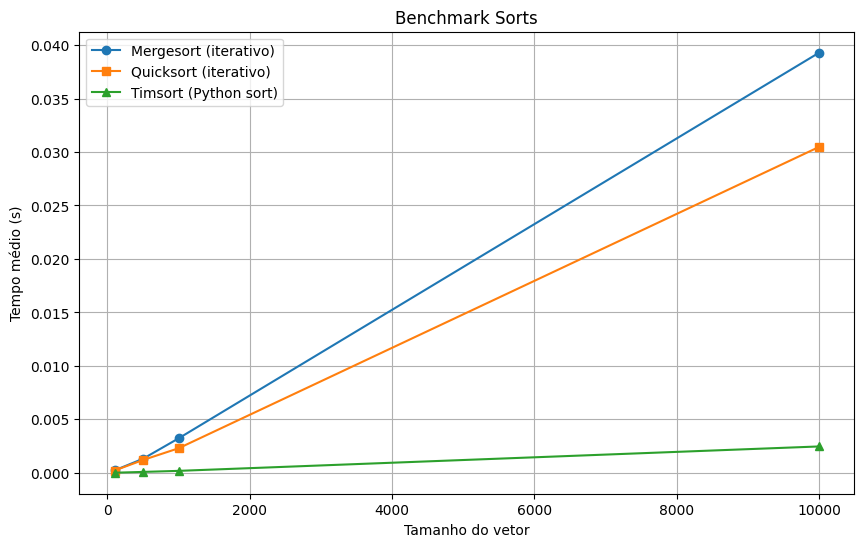

In [ ]:
import matplotlib.pyplot as plt

def benchmark_sorts(sizes, repeats=3):
    times_merge = []
    times_quick = []
    times_tim = []

    for n in sizes:
        sample = [random.random() for _ in range(n)]

        # Mergesort
        t = 0
        for _ in range(repeats):
            arr = list(range(n))
            start = time.time()
            mergesort(arr, compare=lambda i, j: sample[i] <= sample[j])
            end = time.time()
            t += end - start
        times_merge.append(t / repeats)

        # Quicksort
        t = 0
        for _ in range(repeats):
            arr = list(range(n))
            start = time.time()
            quicksort(arr, compare=lambda i, j: sample[i] <= sample[j])
            end = time.time()
            t += end - start
        times_quick.append(t / repeats)

        # Timsort
        t = 0
        for _ in range(repeats):
            arr = list(range(n))
            start = time.time()
            arr.sort(key=lambda i: sample[i])
            end = time.time()
            t += end - start
        times_tim.append(t / repeats)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, times_merge, label='Mergesort (iterativo)', marker='o')
    plt.plot(sizes, times_quick, label='Quicksort (iterativo)', marker='s')
    plt.plot(sizes, times_tim, label='Timsort (Python sort)', marker='^')
    plt.xlabel('Tamanho do vetor')
    plt.ylabel('Tempo médio (s)')
    plt.title('Benchmark Sorts')
    plt.legend()
    plt.grid(True)
    plt.show()

# Exemplo de chamada
benchmark_sorts(sizes=[100, 500, 1000, 10000], repeats=10)

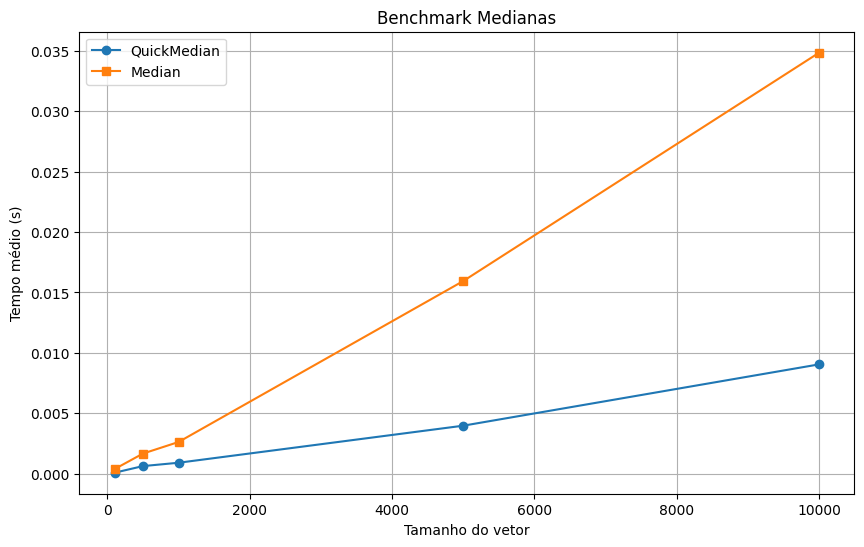

In [ ]:
def benchmark_medians(sizes, repeats=3):
    times_quick = []
    times_numpy = []

    for n in sizes:
        t = 0
        for _ in range(repeats):
            v = [random.random() for _ in range(n)]
            start = time.time()
            quickmedian(v.copy())
            end = time.time()
            t += end - start
        times_quick.append(t / repeats)

        t = 0
        for _ in range(repeats):
            v = [random.random() for _ in range(n)]
            start = time.time()
            median(v)
            end = time.time()
            t += end - start
        times_numpy.append(t / repeats)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, times_quick, label='QuickMedian', marker='o')
    plt.plot(sizes, times_numpy, label='Median', marker='s')
    plt.xlabel('Tamanho do vetor')
    plt.ylabel('Tempo médio (s)')
    plt.title('Benchmark Medianas')
    plt.legend()
    plt.grid(True)
    plt.show()

# Exemplo de chamada
benchmark_medians(sizes=[100, 500, 1000, 5000, 10000], repeats=3)